<a href="https://colab.research.google.com/github/ferris77/my_notebooks/blob/main/python_alura/07-movie_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook de estudo da disciplina de introdução à ML da Alura.


*   Aluno: Lucas Ferreira
*   Data: Fev/2021



In [1]:
import pandas as pd

In [2]:
#importar nossa base de dados .csv
uri_filmes = "https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv"
filmes = pd.read_csv(uri_filmes)
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
#definir um dicionário apra renormear as colunas para portugês
mapa = {
    "movieId" : "filme_id",
    "title" : "titulo",
    "genres" : "genero"
    }
filmes = filmes.rename(columns = mapa)
filmes.head()

,filme_id,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Vamos separar os generos em varias colunas e preencher estas colunas com valores binarios, a fim de facilitar a visualização das categorias em cada linha (filme)

In [4]:
#usar as funcionalidades do pandas para criar várias colunas com todos os gêneros disponíveis, alocando informações binárias em cada uma
#extrair os dummies
generos = filmes.genero.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
#concatenar os dois dataframes, sendo que o generos será adicionado ao lado do filmes (axis = 1)
dados_dos_filmes = pd.concat([filmes, generos], axis = 1)
dados_dos_filmes.head()

,filme_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
#vamos escalar nossos dados para manter um padrão de base próximo de -1 a 1, o que nos ajudará nos processos de ML
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [8]:
#vamos agrupar (clusterização) os filmes pro gêneros
from sklearn.cluster import KMeans

In [9]:
modelo = KMeans(n_clusters = 3)

modelo.fit(generos_escalados)

print(f'Grupos {modelo.labels_}')

Grupos [1 1 2 ... 0 1 2]


In [10]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.15078077 -0.10036384 -0.23400142 -0.25066674 -0.73353021
   0.18934973 -0.21268747  0.42494677 -0.17642554  0.08951104  0.19753345
  -0.06208217 -0.10730909  0.17469502 -0.09399168  0.10318111  0.40528225
   0.11959694  0.04924317]
 [-0.05917995  0.35271317  1.42934821  1.96820637  1.84421842 -0.01705608
  -0.31387468 -0.20787783 -0.65137385  1.47869348 -0.09492563 -0.23774822
   0.70910197  0.33811909 -0.11849301 -0.2700609   0.32583106 -0.39795231
  -0.17116923 -0.09362185]
 [ 0.09555195 -0.29775452 -0.24932438 -0.21440141 -0.15863226  0.99168295
  -0.17039643  0.3421118  -0.39667379 -0.16023972 -0.09492563 -0.2018811
  -0.1071498   0.05347624 -0.20321815  0.19910771 -0.2264715  -0.43836205
  

In [11]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns = generos.columns) #criar os grupos de dados conforme modelo do K-Means
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.150781,-0.100364,-0.234001,-0.250667,-0.733530,0.189350,-0.212687,0.424947,-0.176426,0.089511,0.197533,-0.062082,-0.107309,0.174695,-0.093992,0.103181,0.405282,0.119597,0.049243
1,-0.059180,0.352713,1.429348,1.968206,1.844218,-0.017056,-0.313875,-0.207878,-0.651374,1.478693,-0.094926,-0.237748,0.709102,0.338119,-0.118493,-0.270061,0.325831,-0.397952,-0.171169,-0.093622
2,0.095552,-0.297755,-0.249324,-0.214401,-0.158632,0.991683,-0.170396,0.342112,-0.396674,-0.160240,-0.094926,-0.201881,-0.107150,0.053476,-0.203218,0.199108,-0.226472,-0.438362,-0.114908,-0.041089


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fae95bdc290>,
      dtype=object)

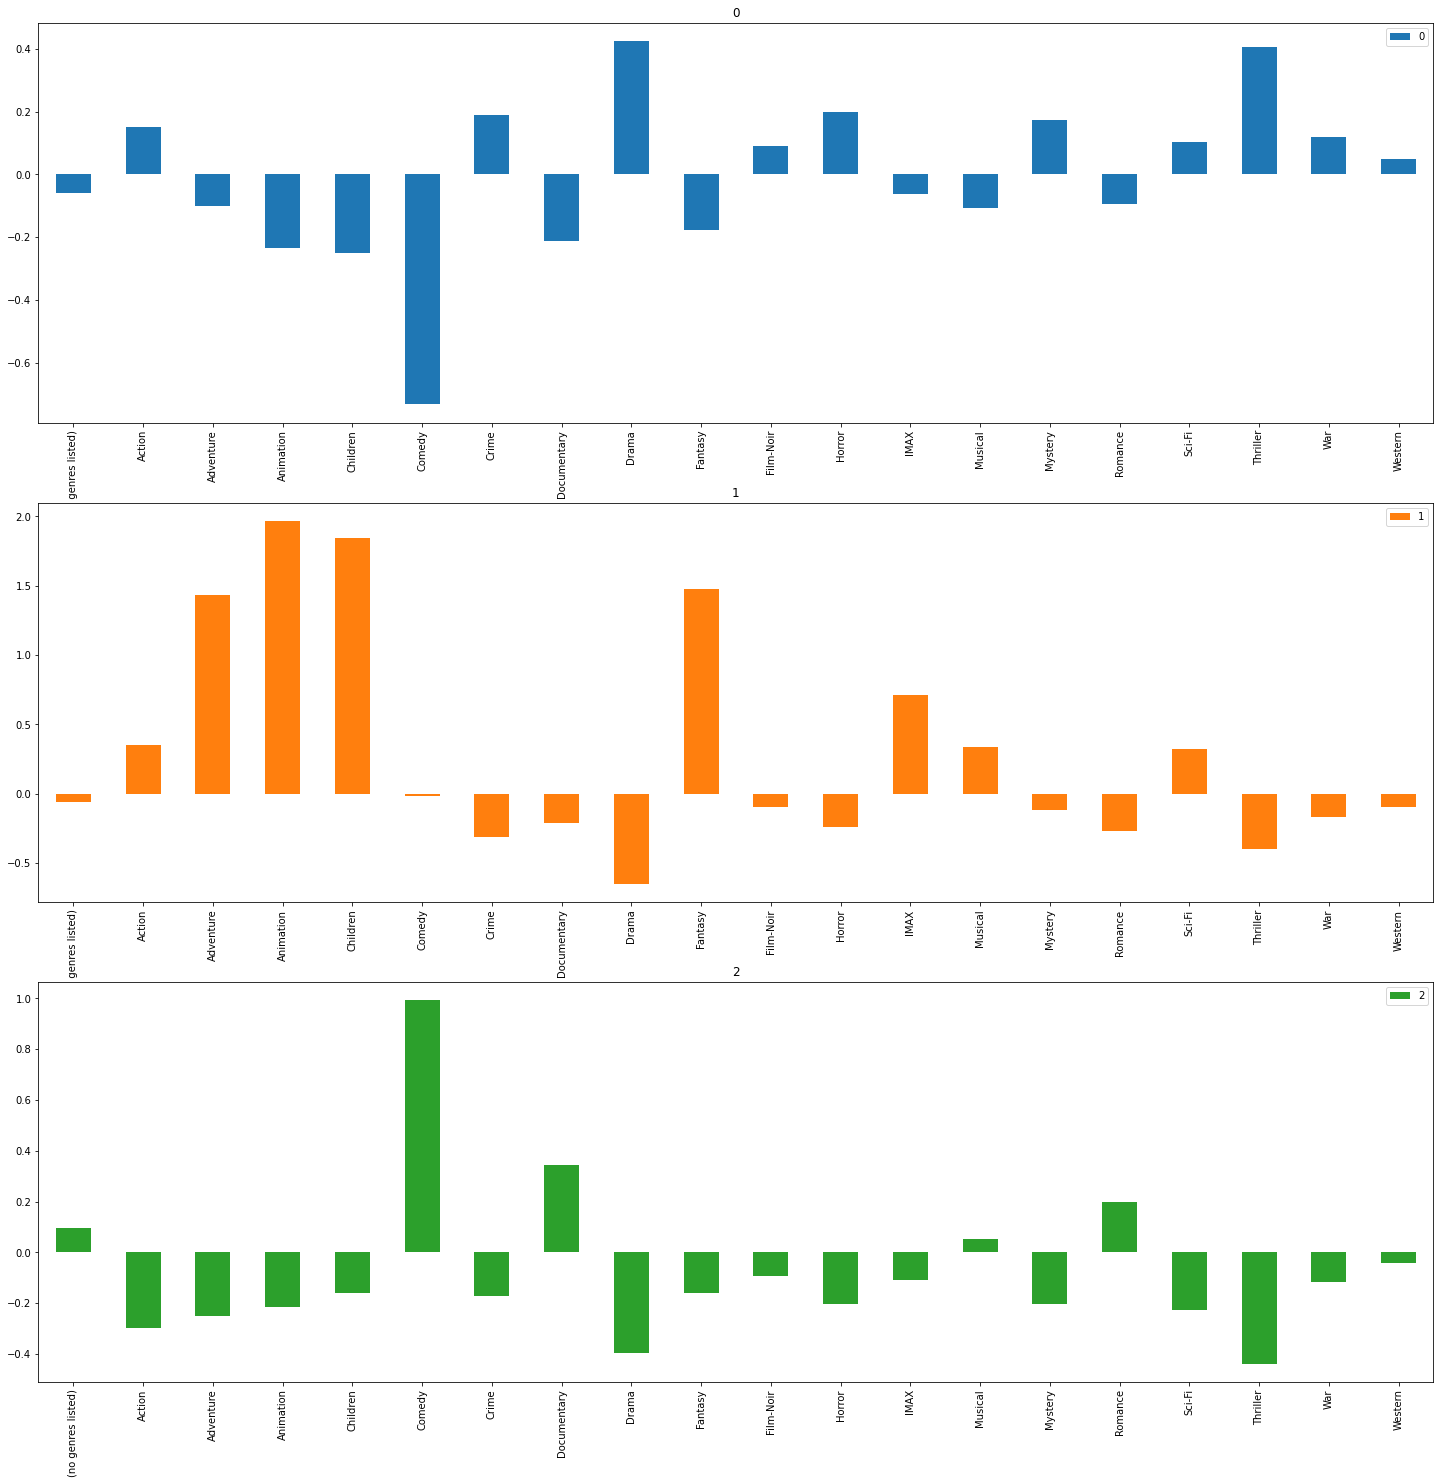

In [12]:
grupos.transpose().plot.bar(subplots = True, figsize = (25, 25), sharex = False)

In [13]:
grupo = 2

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4256,6212,Bringing Down the House (2003),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3965,5589,Indian Summer (1993),Comedy|Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6343,49220,For Your Consideration (2006),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9600,175781,Der Herr Karl (1961),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6737,59141,Son of Rambow (2007),Children|Comedy|Drama,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1777,2375,"Money Pit, The (1986)",Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8729,127098,Louis C.K.: Live at The Comedy Store (2015),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8485,113275,The Hundred-Foot Journey (2014),Comedy|Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8037,98230,10 Years (2011),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
9015,140301,The Escort (2015),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [14]:
from sklearn.datasets import make_blobs

In [15]:
dados, _ = make_blobs(n_samples=1000, n_features=2, random_state=7) #make_blobs retorna um par ordenado (x,y), porém, só queremos o x
dados = pd.DataFrame(dados, columns=['coluna1', 'coluna2'])
dados.head()

,coluna1,coluna2
0,9.829632,0.763094
1,-9.723548,4.100788
2,10.403457,1.761671
3,-2.253417,4.660486
4,13.059859,-0.004112


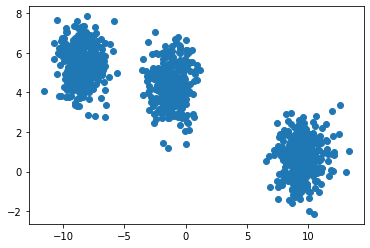

In [16]:
import matplotlib.pyplot as plt
plt.scatter(x=dados.coluna1, y=dados.coluna2)

In [17]:
modelo = KMeans(n_clusters=3)
grupos = modelo.fit_predict(dados)

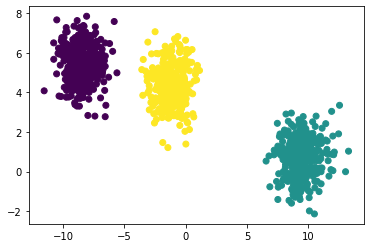

In [18]:
plt.scatter(x=dados.coluna1, y=dados.coluna2, c=grupos, cmap='viridis')

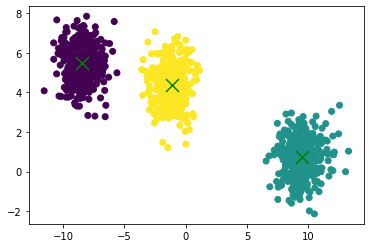

In [19]:
centroides = modelo.cluster_centers_
plt.scatter(x=dados.coluna1, y=dados.coluna2, c=grupos, cmap='viridis')
plt.scatter(centroides[:,0], centroides[:,1], marker='x', s=169, linewidths=5, color='g', zorder=8)

In [20]:
#algoritmo de redução de dimensionalidade para conseguirmos plotar as 20 dimensões de filmes
from sklearn.manifold import TSNE

In [21]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[  4.467969 ,  52.98423  ],
       [ 22.996826 , -48.670013 ],
       [ 11.192014 ,   3.4082992],
       ...,
       [ -8.596209 , -14.79512  ],
       [ 21.63967  , -23.965076 ],
       [ -7.6698513,  28.758318 ]], dtype=float32)

In [22]:
modelo.labels_

array([1, 0, 1, 2, 1, 1, 0, 1, 0, 2, 2, 2, 1, 2, 0, 1, 2, 1, 2, 0, 2, 1,
       0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0,
       2, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 1, 1, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 1, 0, 0, 2, 2, 2,
       0, 1, 2, 0, 1, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 2, 0, 1, 2, 2, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 2, 0, 2, 1,
       2, 0, 2, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 2,
       2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 1, 0, 2, 0, 1, 1, 2, 2,
       0, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 1, 1,
       0, 1, 0, 1, 0, 2, 0, 2, 2, 1, 1, 1, 2, 0, 2, 2, 1, 1, 0, 1, 1, 1,
       1, 2, 1, 1, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0,
       1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1,
       0, 2, 2, 0, 1, 1, 2, 0, 2, 0, 1, 2, 0, 1, 2,

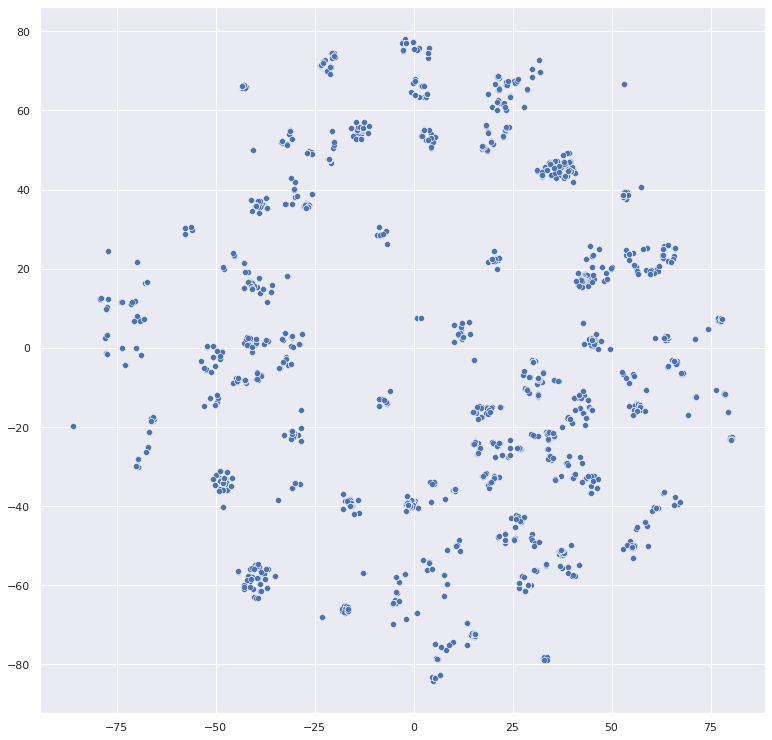

In [23]:
import seaborn as sns

sns.set(rc={'figure.figsize':(13,13)})

sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1], palette=sns.color_palette('Set1', 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fae92fbbb90>,
      dtype=object)

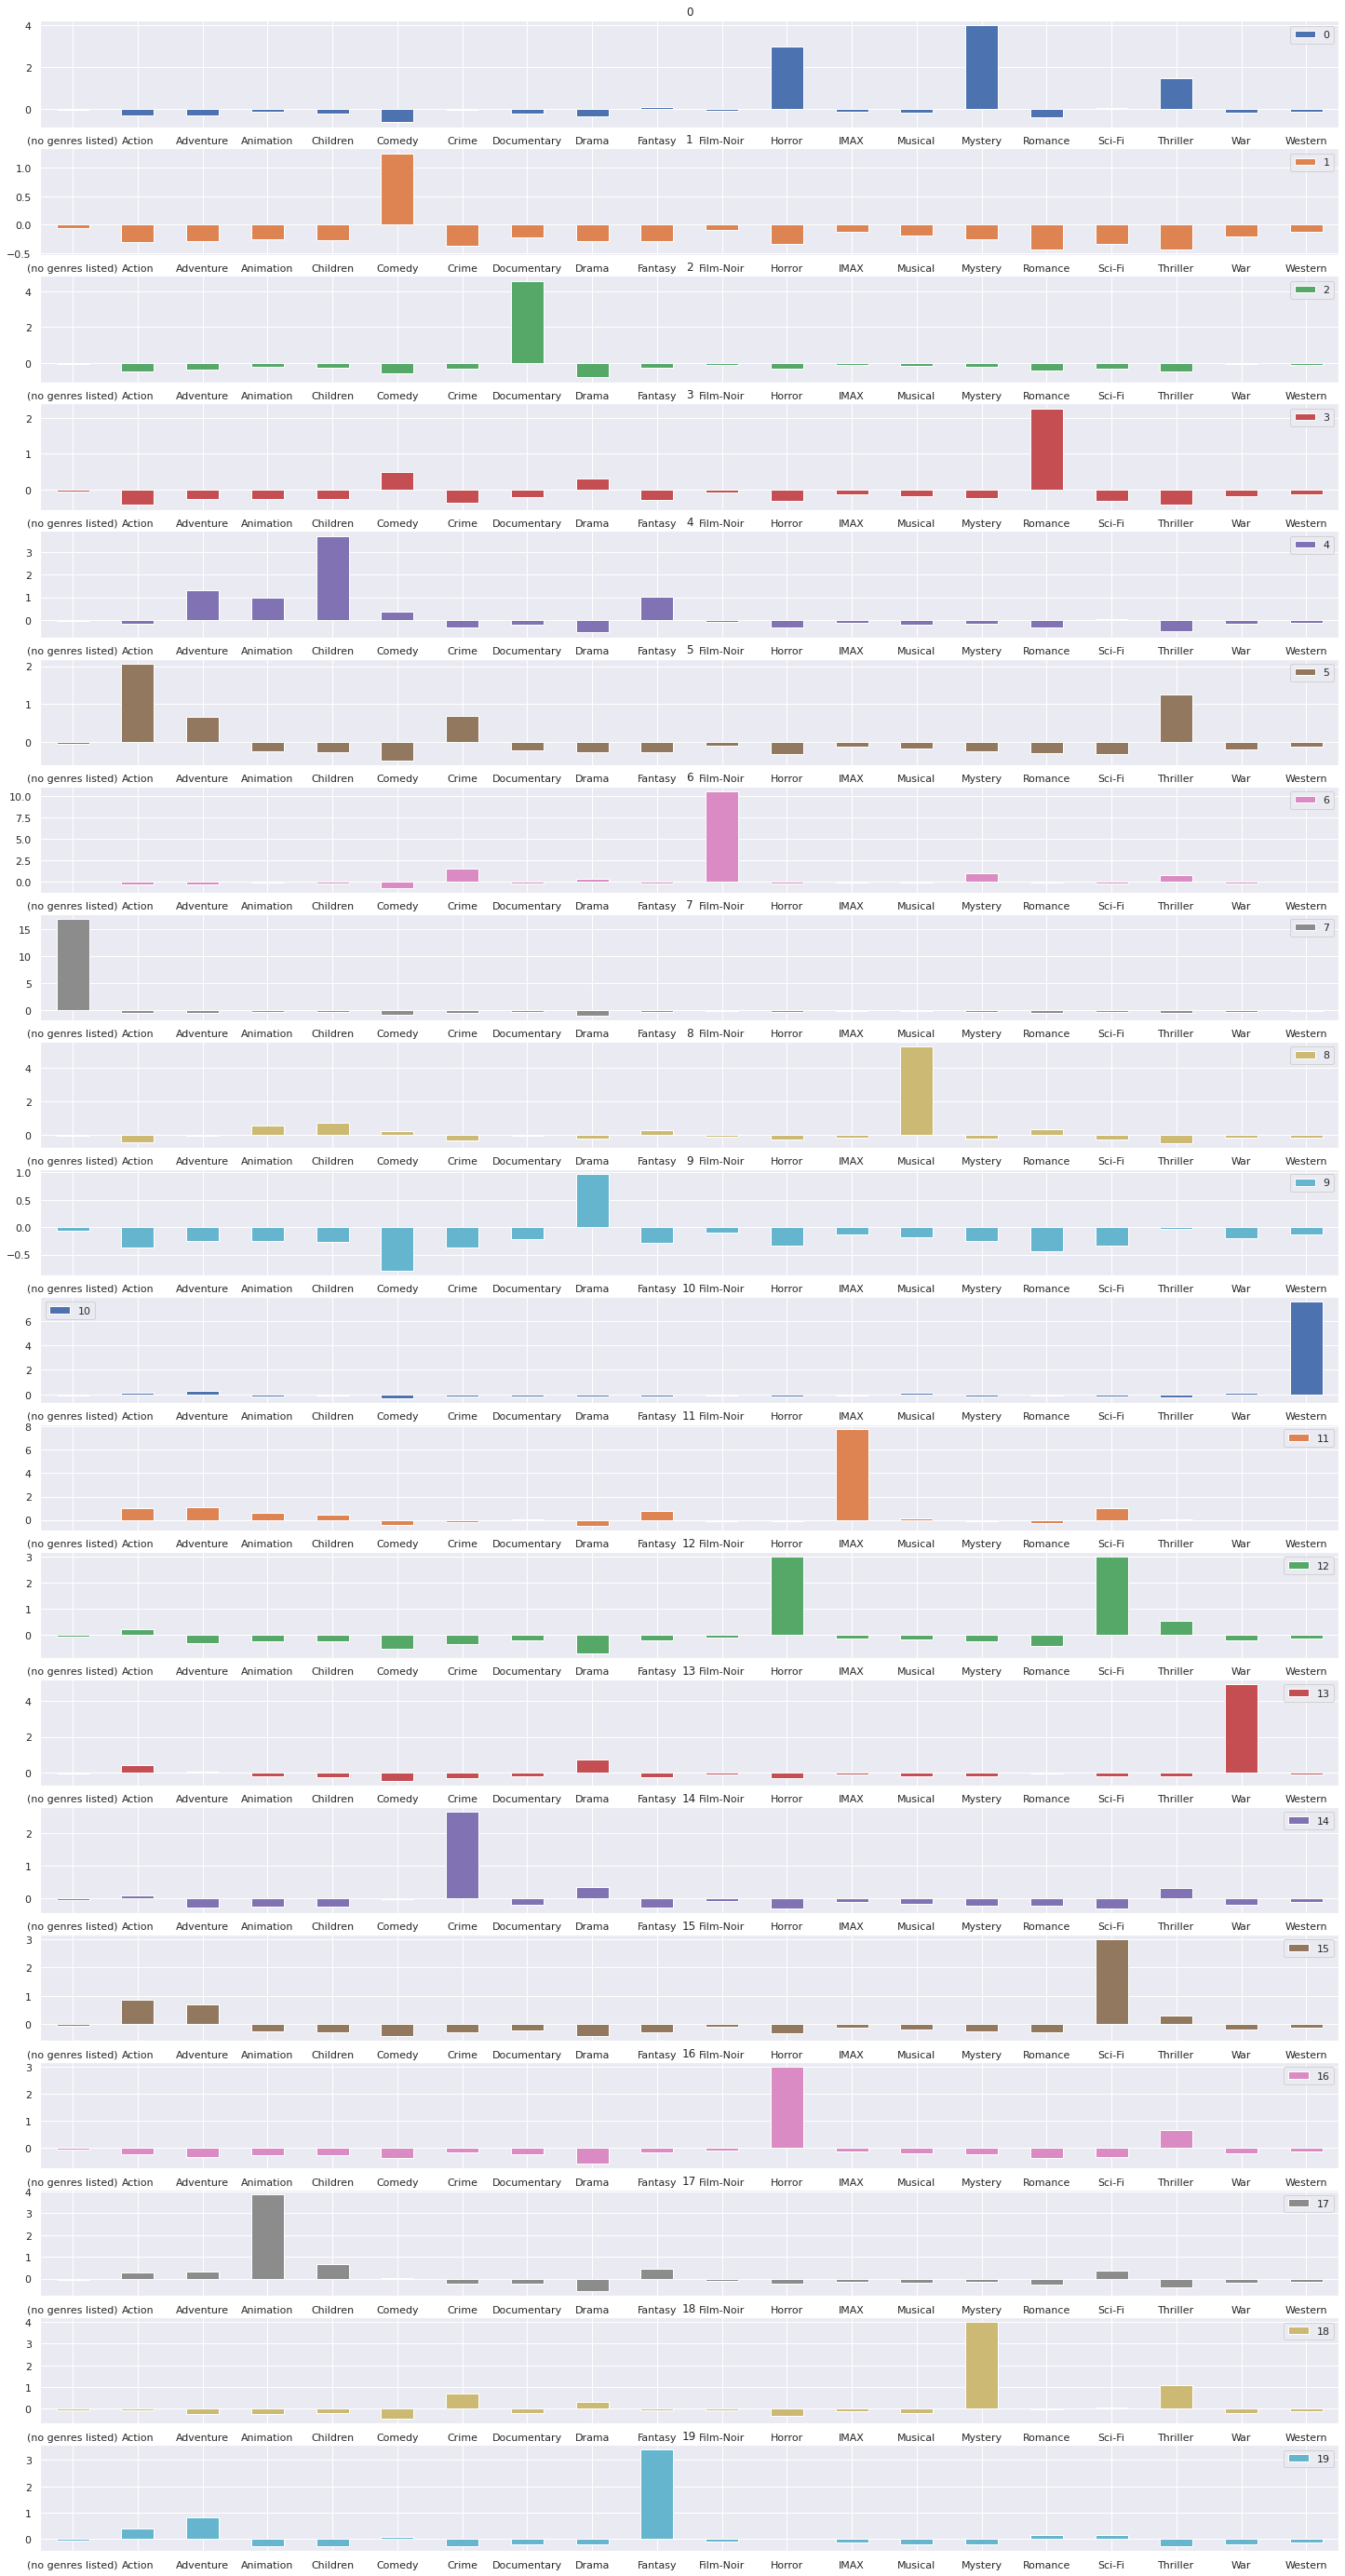

In [24]:
modelo = KMeans(n_clusters=20)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos.transpose().plot.bar(subplots=True, figsize=(25,50), sharex=False, rot=0)

In [25]:
grupo = 11

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
8339,107953,Dragon Ball Z: Battle of Gods (2013),Action|Animation|Fantasy|IMAX,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
8026,97938,Life of Pi (2012),Adventure|Drama|IMAX,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
6522,54001,Harry Potter and the Order of the Phoenix (2007),Adventure|Drama|Fantasy|IMAX,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0
8199,103253,Elysium (2013),Action|Drama|Sci-Fi|IMAX,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
8358,108945,RoboCop (2014),Action|Crime|Sci-Fi|IMAX,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
7064,69526,Transformers: Revenge of the Fallen (2009),Action|Adventure|Sci-Fi|IMAX,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6852,62081,Eagle Eye (2008),Action|Crime|Thriller|IMAX,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
7302,76093,How to Train Your Dragon (2010),Adventure|Animation|Children|Fantasy|IMAX,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
7411,80363,Resident Evil: Afterlife (2010),Action|Horror|Sci-Fi|Thriller|IMAX,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0
7455,81564,Megamind (2010),Action|Animation|Children|Comedy|Sci-Fi|IMAX,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [26]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]


In [27]:
kmeans(20, generos_escalados)

[20, 55324.359811942966]

In [28]:
kmeans(3, generos_escalados)

[3, 166292.33599796717]

In [29]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179558.0960874843],
 [3, 168062.525262716],
 [4, 157556.12770561536],
 [5, 147939.69585501184],
 [6, 137419.4925111367],
 [7, 128698.7652006933],
 [8, 120074.24153695077],
 [9, 111024.03513229164],
 [10, 101321.1325176954],
 [11, 94878.5718762849],
 [12, 86544.4360688739],
 [13, 79052.7913935959],
 [14, 76901.89626125104],
 [15, 68281.52600087532],
 [16, 63189.304888797036],
 [17, 61497.61809847558],
 [18, 58669.01415710408],
 [19, 56835.85978076218],
 [20, 54469.0223264588],
 [21, 53651.463543852806],
 [22, 51893.02722758698],
 [23, 50537.17060420275],
 [24, 49198.70996382886],
 [25, 48209.15585686028],
 [26, 46405.19829470376],
 [27, 46417.75580717463],
 [28, 45282.86708458211],
 [29, 43872.16465804767],
 [30, 42600.556805304426],
 [31, 41959.6245523728],
 [32, 40763.09249725862],
 [33, 39886.05091130336],
 [34, 39701.89755305207],
 [35, 38687.74255947302],
 [36, 38039.37067617961],
 [37, 36934.94499238625],
 [38, 36723.15738021045],
 [39, 35981.99088610649],
 [4

In [30]:
resultado = pd.DataFrame(resultado, columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179558.096087
2,3,168062.525263
3,4,157556.127706
4,5,147939.695855
5,6,137419.492511
6,7,128698.765201
7,8,120074.241537
8,9,111024.035132
9,10,101321.132518


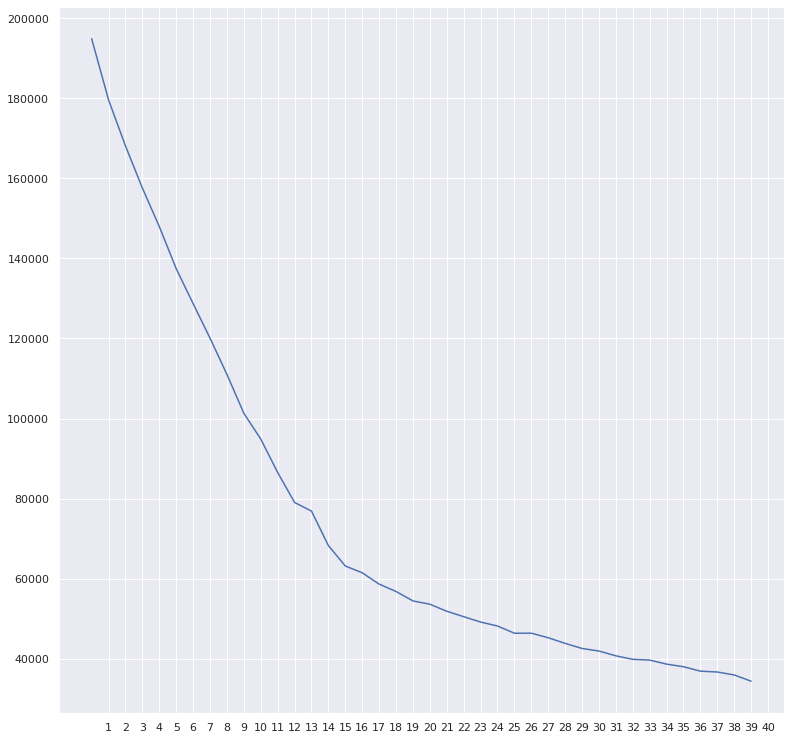

In [31]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fae90fcf590>,
      dtype=object)

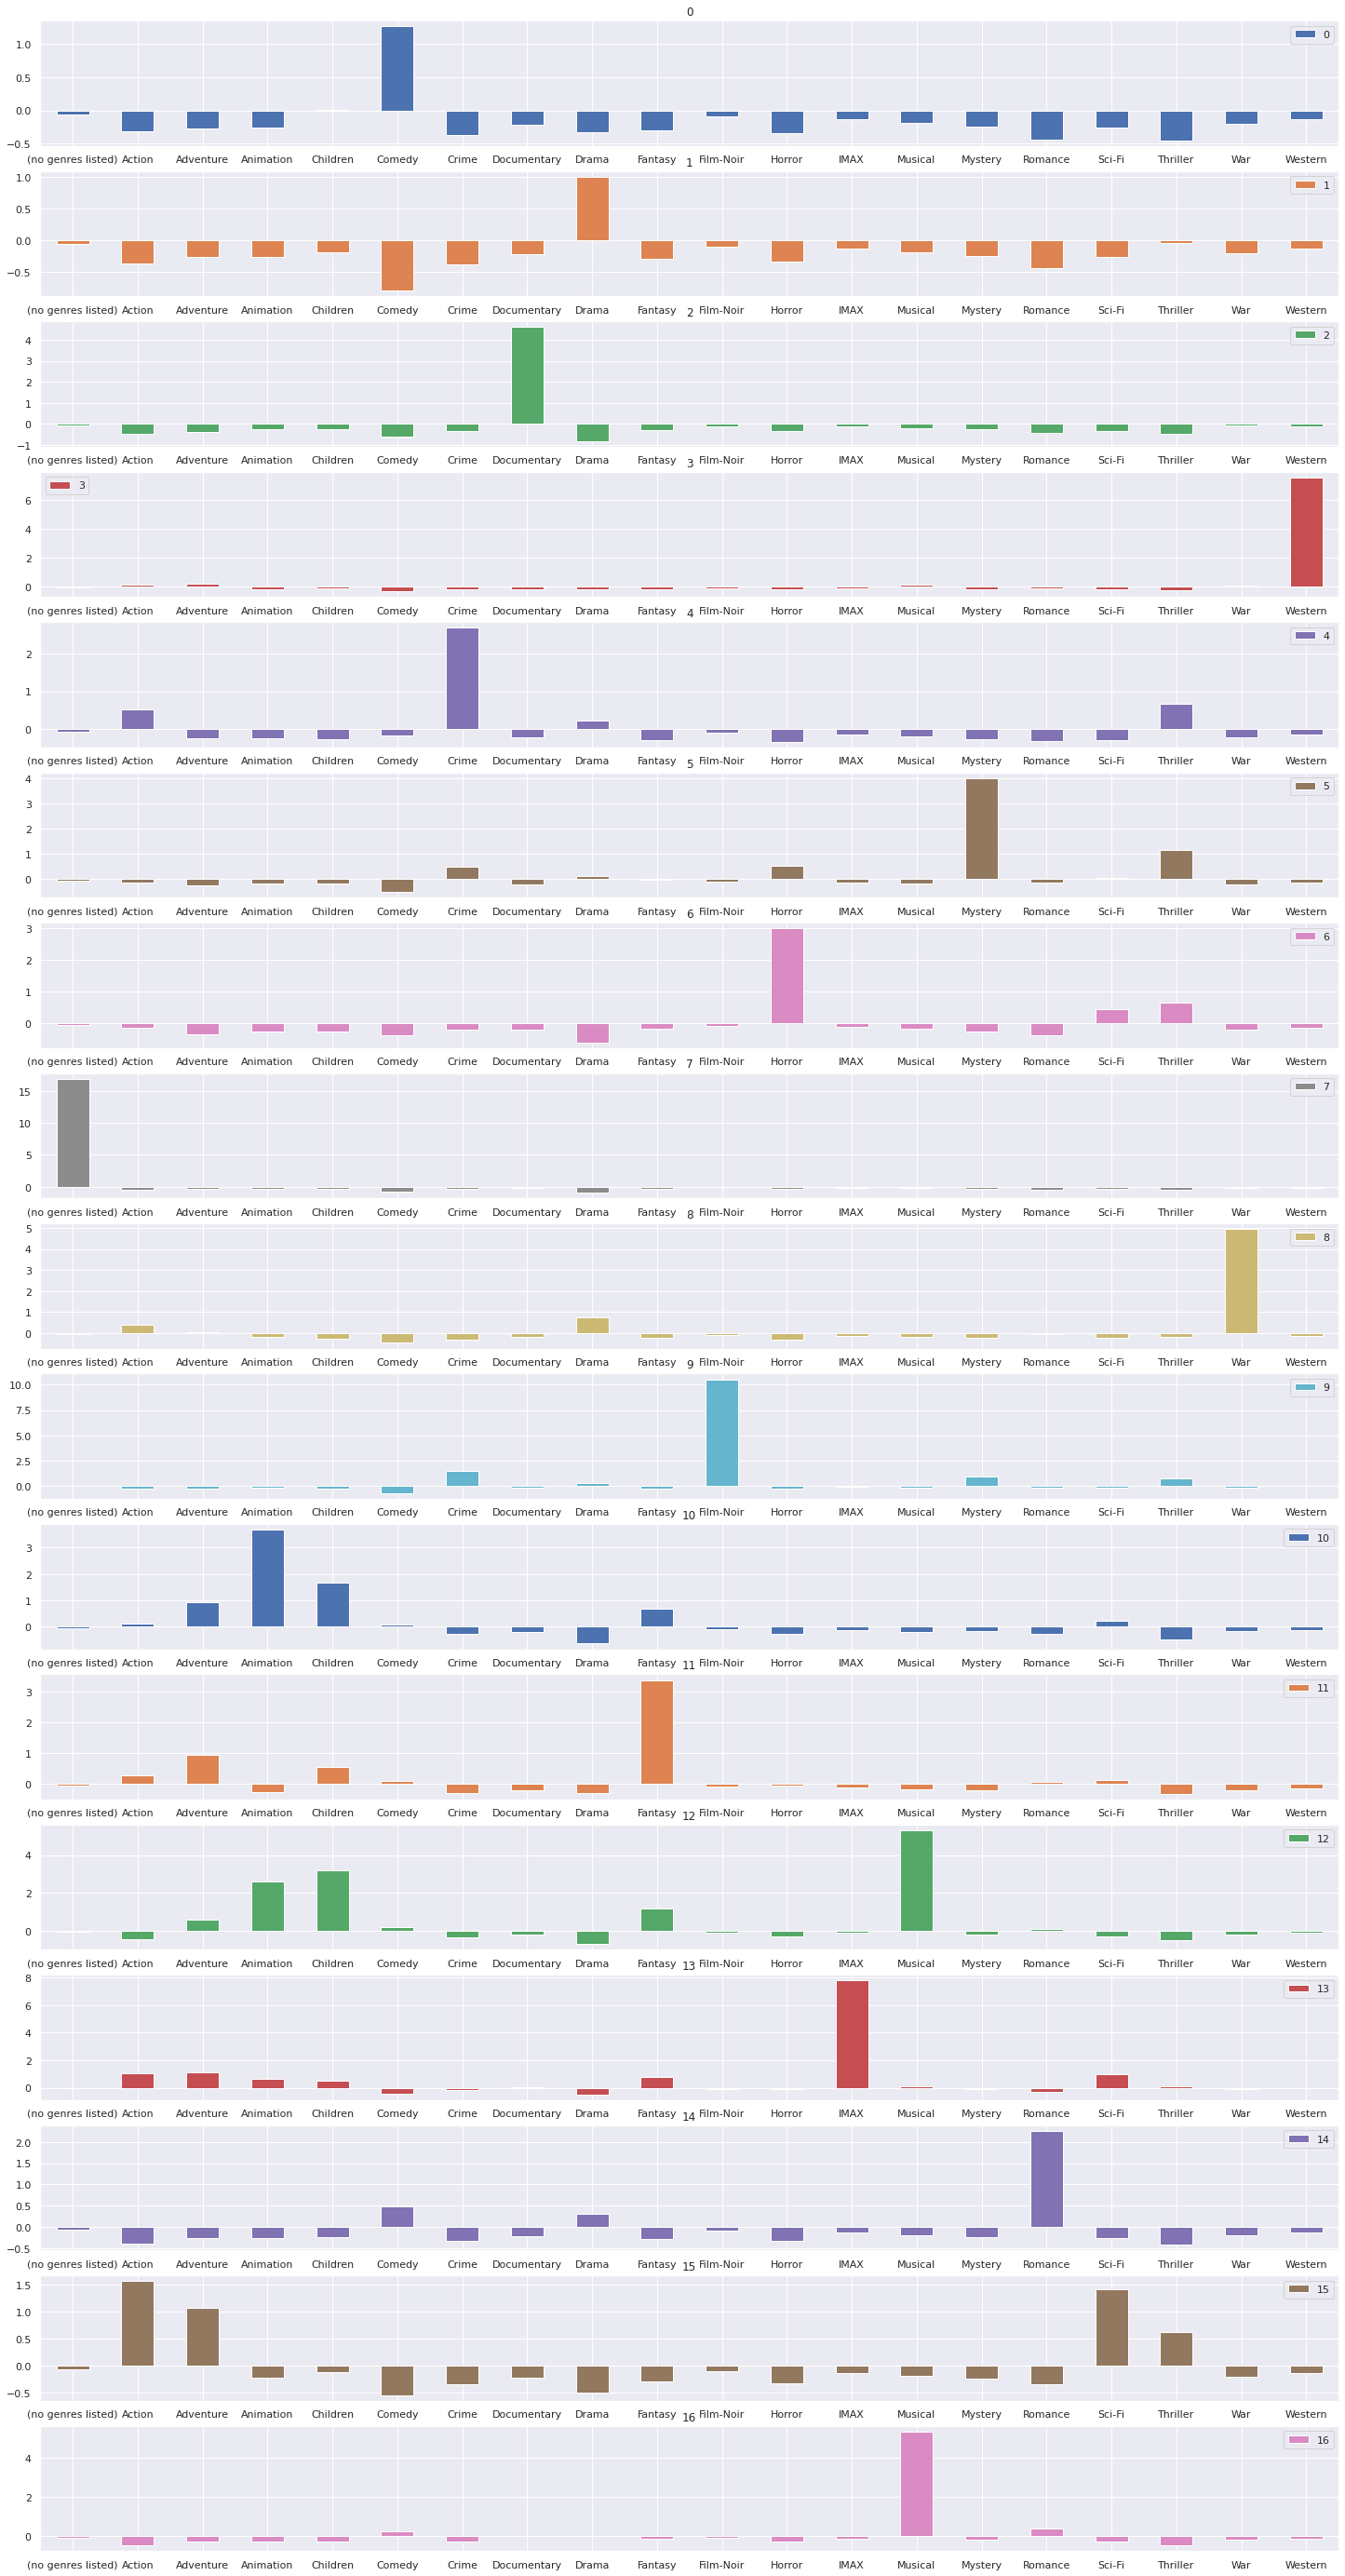

In [32]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos.transpose().plot.bar(subplots=True, figsize=(25,50), sharex=False, rot=0)

In [33]:
grupo = 16

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
304,346,Backbeat (1993),Drama|Musical,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3484,4757,Rock Star (2001),Comedy|Drama|Musical,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5548,26680,Cry-Baby (1990),Comedy|Musical|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
8254,104875,"History of Future Folk, The (2012)",Adventure|Comedy|Musical|Sci-Fi,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
700,918,Meet Me in St. Louis (1944),Musical,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5025,7815,True Stories (1986),Comedy|Musical,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1136,1487,Selena (1997),Drama|Musical,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5930,34018,At the Circus (1939),Comedy|Musical,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2309,3061,Holiday Inn (1942),Comedy|Musical,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5033,7835,Song of the Thin Man (1947),Comedy|Crime|Drama|Musical|Mystery|Romance,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0


In [34]:
from sklearn.cluster import AgglomerativeClustering

In [35]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [36]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 36.83626  , -53.01757  ],
       [ 24.326426 , -63.19713  ],
       [ -7.0054674,  22.829271 ],
       ...,
       [ 19.586613 ,   4.940351 ],
       [  6.989287 , -54.85374  ],
       [-18.202597 , -12.559396 ]], dtype=float32)

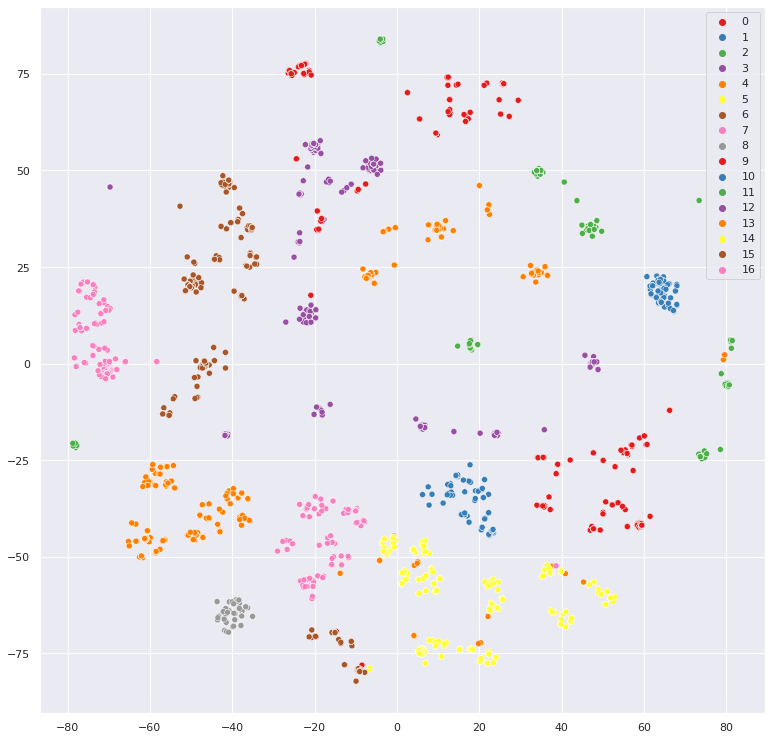

In [37]:
sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1], hue=grupos, palette=sns.color_palette('Set1', 17))

In [38]:
#plotar como árvore hierárquica -> dendrograma
from scipy.cluster.hierarchy import dendrogram, linkage 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fae9035d510>,
      dtype=object)

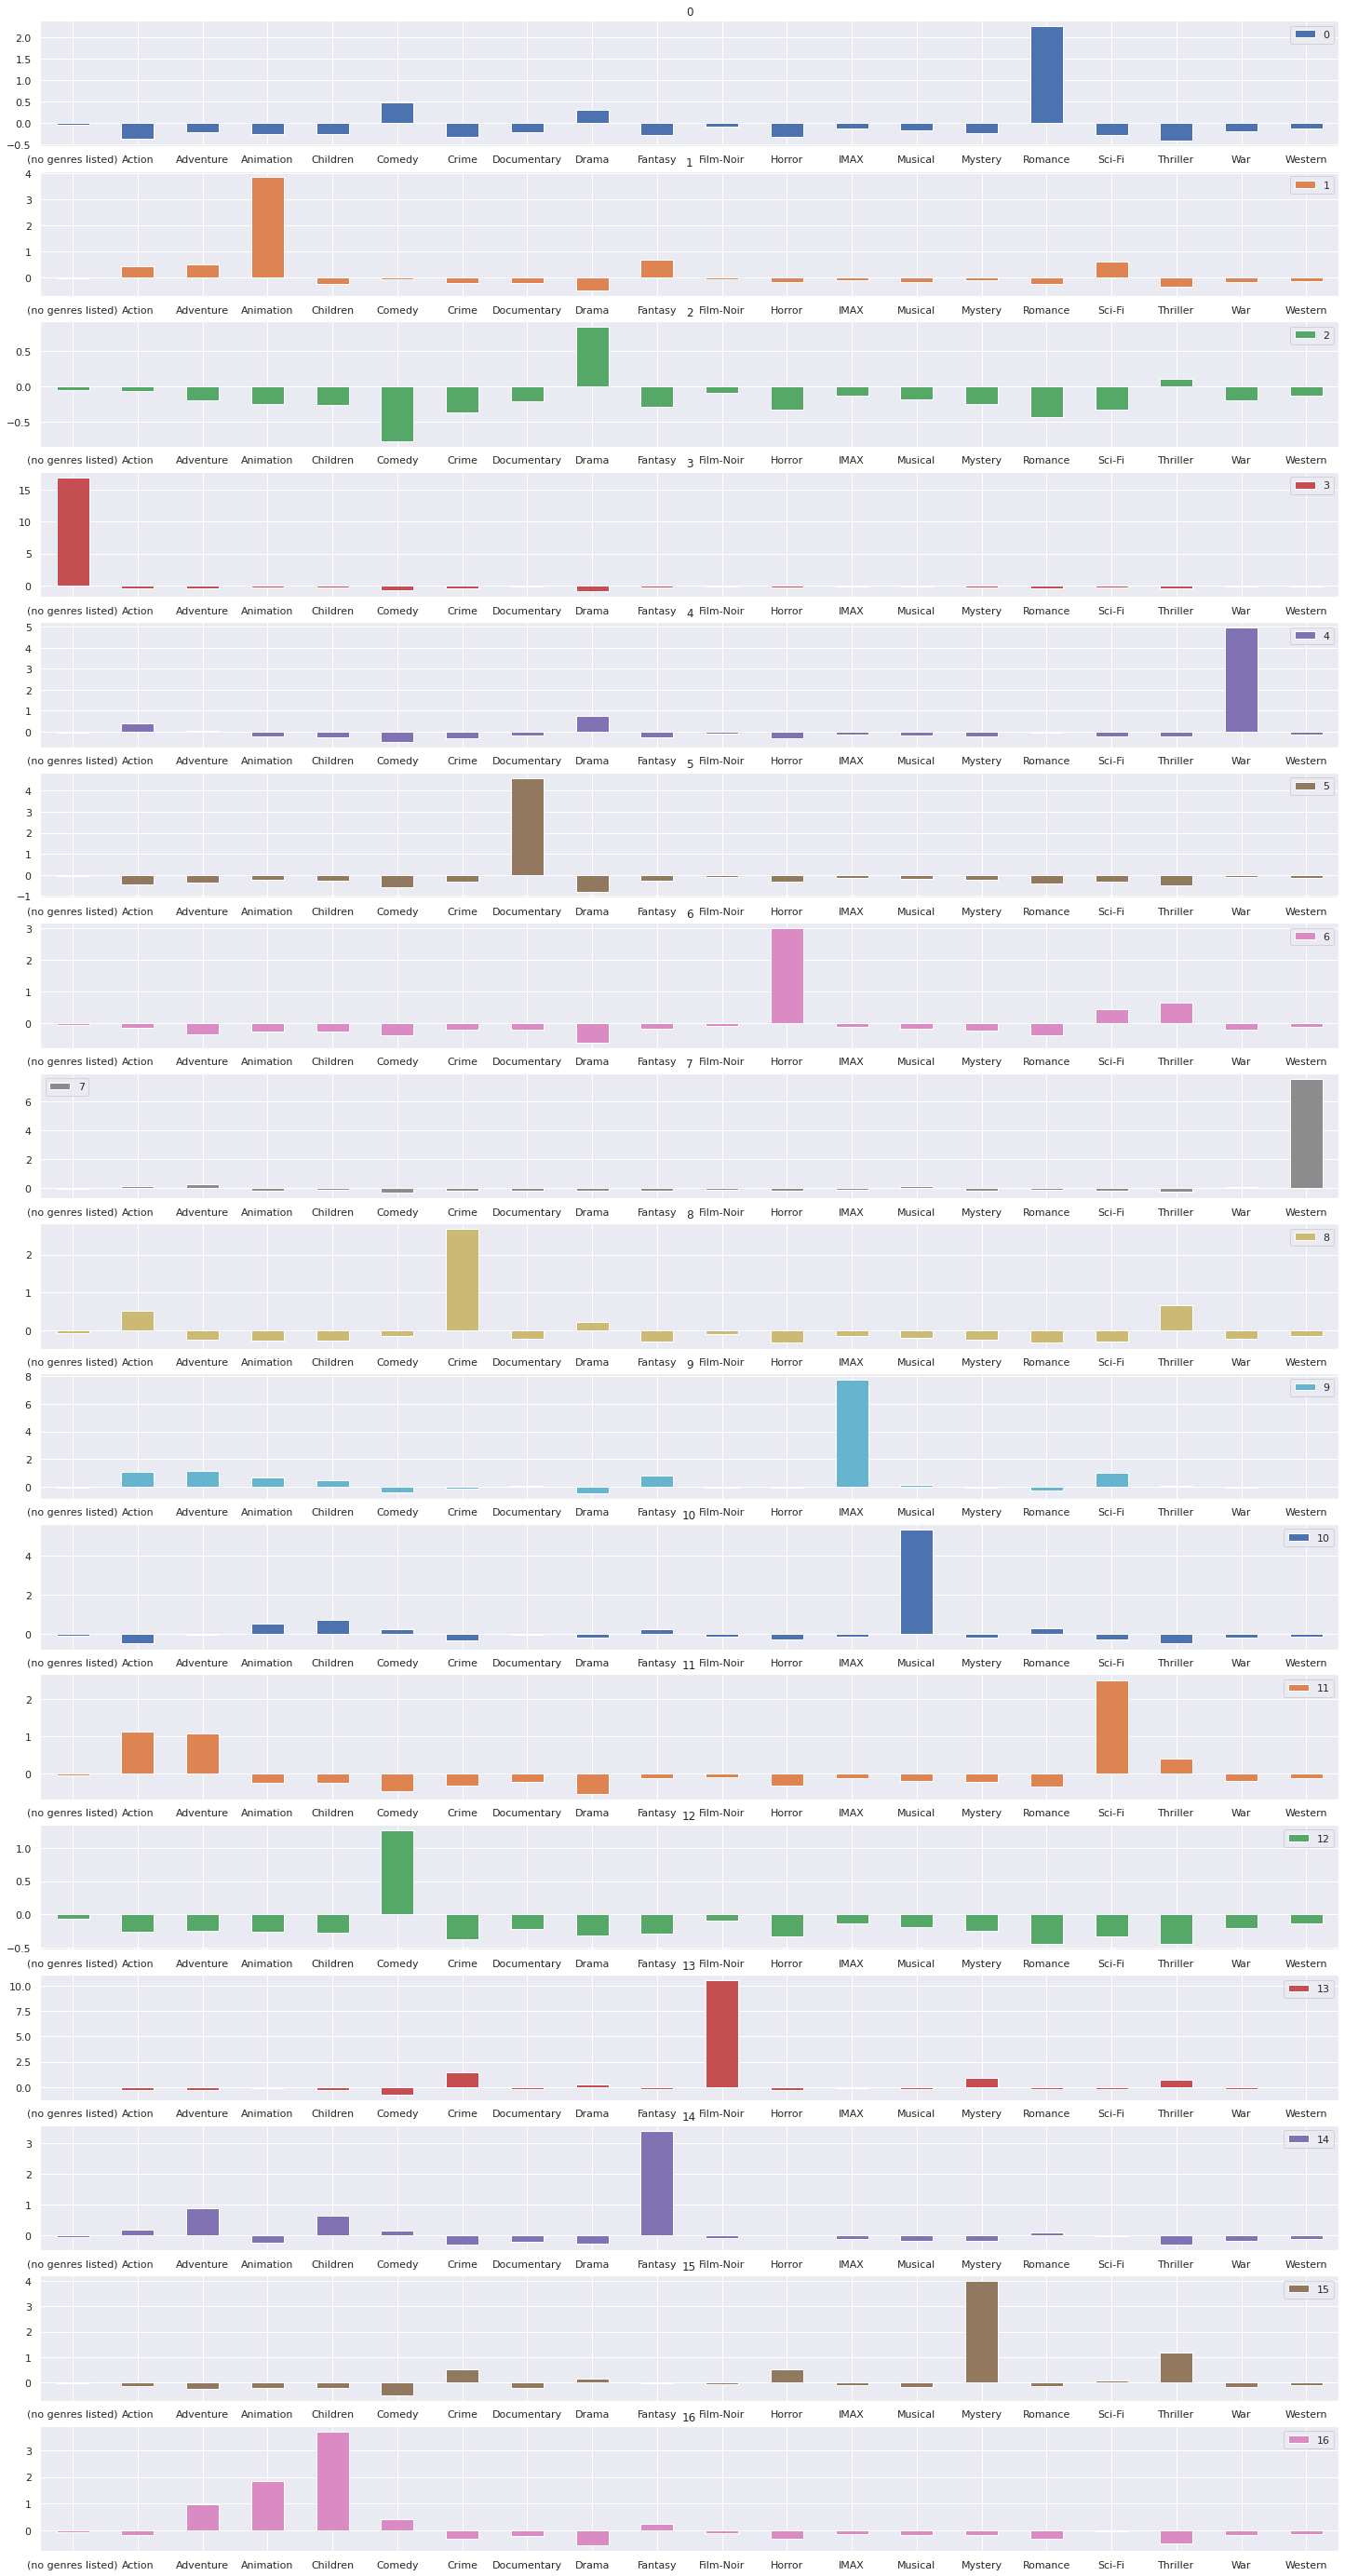

In [39]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos.transpose().plot.bar(subplots=True, figsize=(25,50), sharex=False, rot=0)

In [40]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 2.        , 12.        ,  2.42079921,  2.        ],
       [ 0.        , 17.        ,  2.88656591,  3.        ],
       [ 8.        , 18.        ,  3.27115954,  4.        ],
       [11.        , 19.        ,  3.65577033,  5.        ],
       [ 6.        , 20.        ,  3.77718209,  6.        ],
       [14.        , 21.        ,  4.1913086 ,  7.        ],
       [ 1.        , 16.        ,  4.61736493,  2.        ],
       [15.        , 22.        ,  4.64461676,  8.        ],
       [23.        , 24.        ,  4.66924092, 10.        ],
       [ 5.        , 25.        ,  5.14671837, 11.        ],
       [ 4.        , 26.        ,  5.21484867, 12.        ],
       [10.        , 27.        ,  5.82678712, 13.        ],
       [ 7.        , 28.        ,  7.83933856, 14.        ],
       [ 9.        , 29.        ,  8.22537821, 15.        ],
       [13.        , 30.        , 10.81541725, 16.        ],
       [ 3.        , 31.        , 17.06278674, 17.        ]])

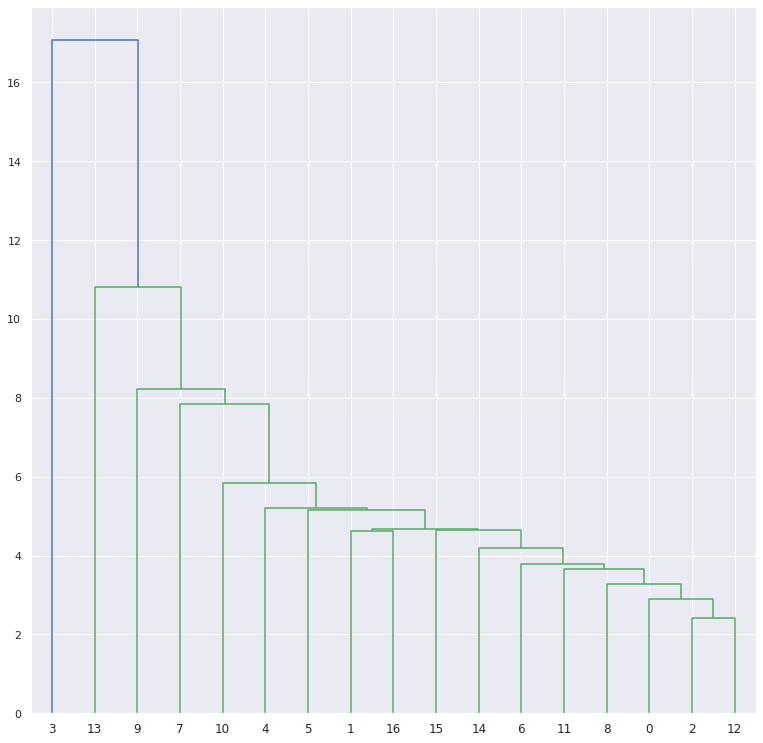

In [41]:
dendrograma = dendrogram(matriz_de_distancia)